In [1]:
import math
import datetime
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf

In [2]:
df = yf.download('AAPL', start = '2016-01-01', end='2023-03-23')

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.074738,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.471445,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.012114,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.040897,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.157446,283192000
...,...,...,...,...,...,...
2023-03-16,152.160004,156.460007,151.639999,155.850006,155.850006,76161100
2023-03-17,156.080002,156.740005,154.279999,155.000000,155.000000,98862500
2023-03-20,155.070007,157.820007,154.149994,157.399994,157.399994,73641400


In [4]:
df.shape

(1817, 6)

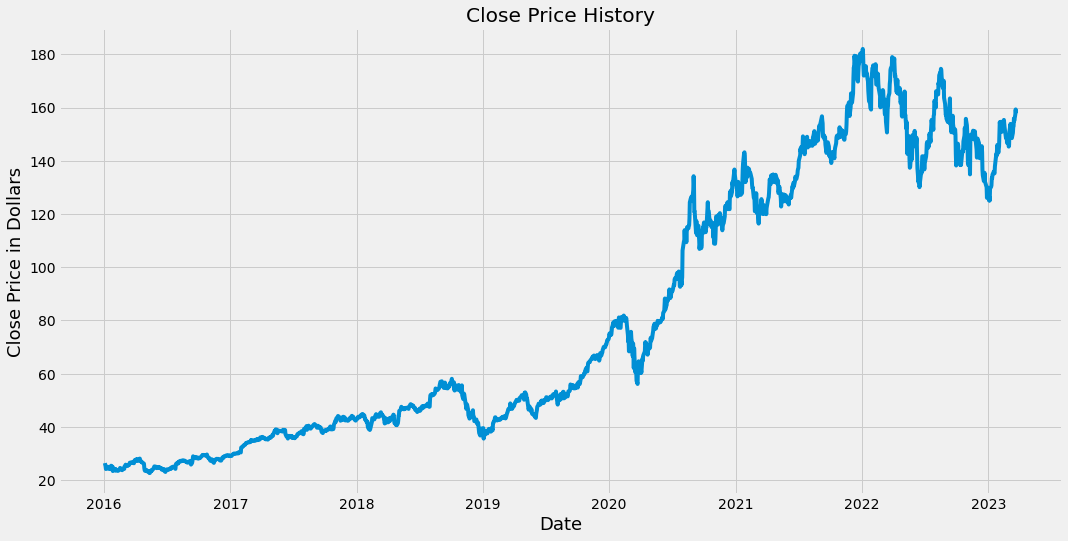

In [5]:
#visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in Dollars', fontsize=18)
plt.show()

In [6]:
#Create a new data frame with only the 'Close' column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len


1454

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02353772],
       [0.01939784],
       [0.01624589],
       ...,
       [0.84563273],
       [0.85742514],
       [0.84832998]])

In [8]:
#create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.02353772, 0.01939784, 0.01624589, 0.00958131, 0.01038106,
       0.01284303, 0.01508547, 0.01105536, 0.01439548, 0.01064764,
       0.00991063, 0.01011448, 0.0093461 , 0.01737494, 0.01427004,
       0.01513251, 0.00482986, 0.00588051, 0.01097695, 0.00954995,
       0.00649209, 0.0094245 , 0.00981653, 0.00577074, 0.0073232 ,
       0.00729183, 0.00616277, 0.00526894, 0.0057237 , 0.00987926,
       0.0122001 , 0.00928337, 0.00893838, 0.01025561, 0.0068214 ,
       0.00903246, 0.01006744, 0.01030266, 0.00995767, 0.0159793 ,
       0.0163243 , 0.0175004 , 0.01986829, 0.01808061, 0.01676337,
       0.01690451, 0.01698291, 0.01869218, 0.01909989, 0.02233026,
       0.02450997, 0.02424339, 0.02443155, 0.02441588, 0.02568607,
       0.02476086, 0.02403952, 0.02328682, 0.02719148, 0.03013957])]
[0.029245730063327924]

[array([0.02353772, 0.01939784, 0.01624589, 0.00958131, 0.01038106,
       0.01284303, 0.01508547, 0.01105536, 0.01439548, 0.01064764,
       0.00991063, 0.01011448, 0.0

In [9]:
#Convert the x_train and y_train to numpy arrays for training the lstm model
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the x_train data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(1394, 60, 1)

In [11]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))


In [12]:
#Compile the model
model.compile(optimizer = 'adam', loss='mean_squared_error')


In [13]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1394/1394 [==============================] - 30s 18ms/step - loss: 0.0013


In [14]:
#Create the testing data set
#Create a new array containing scaled values from index 1394 to end
test_data = scaled_data[training_data_len - 60:, :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60: i, 0])

In [15]:
#Convert the data to a numpy array
x_test  = np.array(x_test)

In [16]:
#Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


12/12 [==============================] - 1s 21ms/step


In [18]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) **2)
rmse

4.475825517302374

C:\Users\Aum\AppData\Local\Temp/ipykernel_21844/1890669890.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


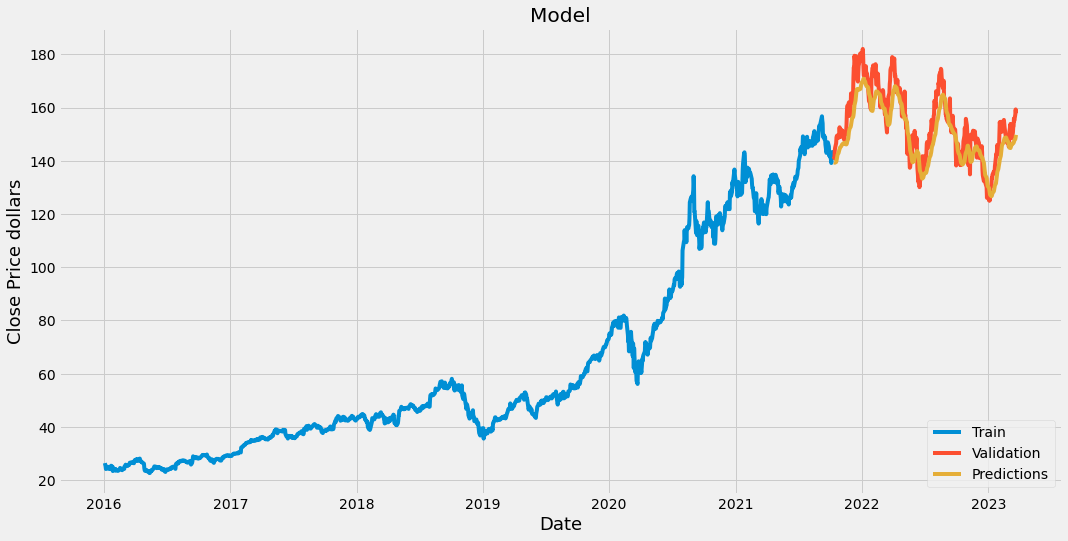

In [19]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len :]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price dollars', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [20]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-10-12,141.509995,139.432999
2021-10-13,140.910004,139.376144
2021-10-14,143.759995,139.241745
2021-10-15,144.839996,139.293930
2021-10-18,146.550003,139.521133
...,...,...
2023-03-16,155.850006,147.032104
2023-03-17,155.000000,147.577286
2023-03-20,157.399994,148.139221
